### CUNY Data 620 - Web Analytics, Summer 2020
**Group Homework Assignment 5**  
**Prof:** Alain Ledon  
**Members:** Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout  

**Youtube Link:** https://www.youtube.com/watch?v=r1sWW66aOCA

### Instructions

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

### Import Packages

In [1]:
import nltk
# nltk.download()
from nltk.book import text6 # Monty Python and the Holy Grail
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### (1) Choose a corpus of interest. 
We have chosen to use the *Monty Python and the Holy Grail* corpus that comes with the nltk library. We will define the following: 

* **tokens**: words, numbers, and punctuations 
* **words**: alphabetic tokens 
* **lexical diversity**: a measure of the richness of the text -- this will tell us on average how many times a word or token is used in the text

### (2) How many total unique words are in the corpus? 
We define **unique words** as the distinct, uncommon, non-case sensitive, alphabetic tokens in the text. Our process will be to:
1. Convert all tokens in the text to lowercase. This will eliminate variations in case-sensitivity. 
2. Remove non-alphabetic tokens. 
3. Remove all stopwords from the text. This will eliminate commonly used words (ex: the, or, and).
4. Calculate the total number of unique words from the set of words in the text. 

In [2]:
# create a function to remove stopwords
def remove_stopwords(text):
    stopWords = nltk.corpus.stopwords.words('english')
    finalText = [word for word in text if word not in stopWords]
    return(finalText)

# convert everything to lowercase, remove stopwords
finalTokens = [token.lower() for token in text6]
words = [term for term in finalTokens if term.isalpha()]
noStopWords = remove_stopwords(words)

# stemmed words
#porter = PorterStemmer()
#stemmedWords = []
#for word in noStopWords:
#    stemmedWords.append(porter.stem(word))

# unique words
uniqueWords = set(noStopWords)

# define counts
numWords = len(words)
numNoStop = len(noStopWords)
numUniqueWordsWStop = len(set(words))
numUniqueWords = len(uniqueWords)
lexDivWords = numNoStop/ numUniqueWords

print('Total tokens: ', len(text6))
print('Total words - all alphabetic: ', numWords)
print('Total words - no stopwords: ', numNoStop)
print('Unique words - no stopwords: ', numUniqueWords)
print('Lexical diversity (no stopwords): ', lexDivWords)

Total tokens:  16967
Total words - all alphabetic:  11450
Total words - no stopwords:  6692
Unique words - no stopwords:  1667
Lexical diversity (no stopwords):  4.014397120575885


This shows that sequentially removing punctuation, capitalization, and stopwords results in a unique word list that is only ~10% of the total corpus!

### (3) Taking the most common words, how many unique words represent half of the total words in the corpus?
We can use the **FreqDist** function from the nltk library to calculate the frequencies of the words in our word list. We will sort the words in descending order, add up the cumulative frequency, and identify how many unique words represent half the total words in the corpus. 

*Note that we define the total words in the corpus as alphabetic tokens only.*

#### Stopwords Included
First, we'll take a look at the results with stopwords **included** in the analysis. 

In [3]:
fdist = nltk.FreqDist(words)
sortedFreq = {k: v for k, v in sorted(fdist.items(), key=lambda item: item[1], reverse=True)}

cumsum = 0
record = 0
for e, value in enumerate(sortedFreq.values()):
    if cumsum <= numNoStop/2:
        cumsum += value
        record = e

print('Total alphabetic words in the corpus - stopwords included: ', numWords)
print('Half of the words in the corpus - stopwords included: ', numWords/2)
print('Number of unique words representing half the total words in the corpus:', record)
print('Percent of unique words: ', record/numUniqueWordsWStop * 100)
#plt.figure(figsize=(20, 5))
#fdist.plot(record, cumulative=True)

Total alphabetic words in the corpus - stopwords included:  11450
Half of the words in the corpus - stopwords included:  5725.0
Number of unique words representing half the total words in the corpus: 21
Percent of unique words:  1.1673151750972763


This tells us that about 1.2% of unique words in the corpus represent half of the total words in the text!

#### Stopwords Excluded
Next, we'll take a look at the results with stopwords **excluded** from the analysis. 

In [4]:
fdist2 = nltk.FreqDist(noStopWords)
sortedFreq2 = {k: v for k, v in sorted(fdist2.items(), key=lambda item: item[1], reverse=True)}

cumsum = 0
record = 0
for e, value in enumerate(sortedFreq2.values()):
    if cumsum <= numWords/2:
        cumsum += value
        record = e

print('Total alphabetic words in the corpus - no stopwords: ', numNoStop)
print('Half of the words in the corpus - no stopwords: ', numNoStop/2)
print('Number of unique words representing half the total words in the corpus:', record)
print('Percent of unique words: ', record/numUniqueWords * 100)

Total alphabetic words in the corpus - no stopwords:  6692
Half of the words in the corpus - no stopwords:  3346.0
Number of unique words representing half the total words in the corpus: 709
Percent of unique words:  42.53149370125975


This analysis shows that stopwords make up a huge portion of the words in the corpus! With the stopwords removed, it takes 42.5% of all unique words to make up half of the words in the text, which means there are many words used only a few times in the text.

### (4) Identify the 200 highest frequency words in this corpus.
#### Stopwords Included
First, we'll look at the frequencies with stopwords **included**. 

In [5]:
highestFreqWords = list(sortedFreq.items())[:200]
highestFreq_df = pd.DataFrame(highestFreqWords, columns = ['word', 'freq'])
# top 10 words
print('Top 10 words in the corpus - stopwords included:','\n', highestFreq_df[0:10])

Top 10 words in the corpus - stopwords included: 
      word  freq
0     the   334
1     you   265
2  arthur   261
3       i   260
4       a   238
5     and   185
6      of   178
7      to   151
8       s   145
9      it   142


Not surprisingly, many of the top words are very common - these were filtered out of the unique word list with the elimination of stopwords. In fact, we can identify the percentage of words in the top 200 list that are stopwords:

In [6]:
swTop200 = []
for word,value in highestFreqWords:
    if word in nltk.corpus.stopwords.words('english'):
        swTop200.append([word,value])

print('Total number of stopwords in top 200 list: ', len(swTop200))
print('Total percent of words in top 200 that are stopwords: ', len(swTop200)/len(highestFreqWords)*100)

Total number of stopwords in top 200 list:  78
Total percent of words in top 200 that are stopwords:  39.0


#### Stopwords Excluded
Next, we'll look at the frequencies with stopwords **excluded**. 

In [7]:
highestFreqWords2 = list(sortedFreq2.items())[:200]
highestFreq_df2 = pd.DataFrame(highestFreqWords2, columns = ['word', 'freq'])
# top 10 words
print('Top 10 words in the corpus - stopwords excluded:','\n', highestFreq_df2[0:10])

Top 10 words in the corpus - stopwords excluded: 
         word  freq
0     arthur   261
1         oh   112
2  launcelot   101
3     knight    84
4    galahad    80
5     father    75
6        sir    72
7         ni    69
8   bedevere    67
9    knights    65


### (5) Create a graph that shows the relative frequency of these 200 words.

#### Stopwords Included

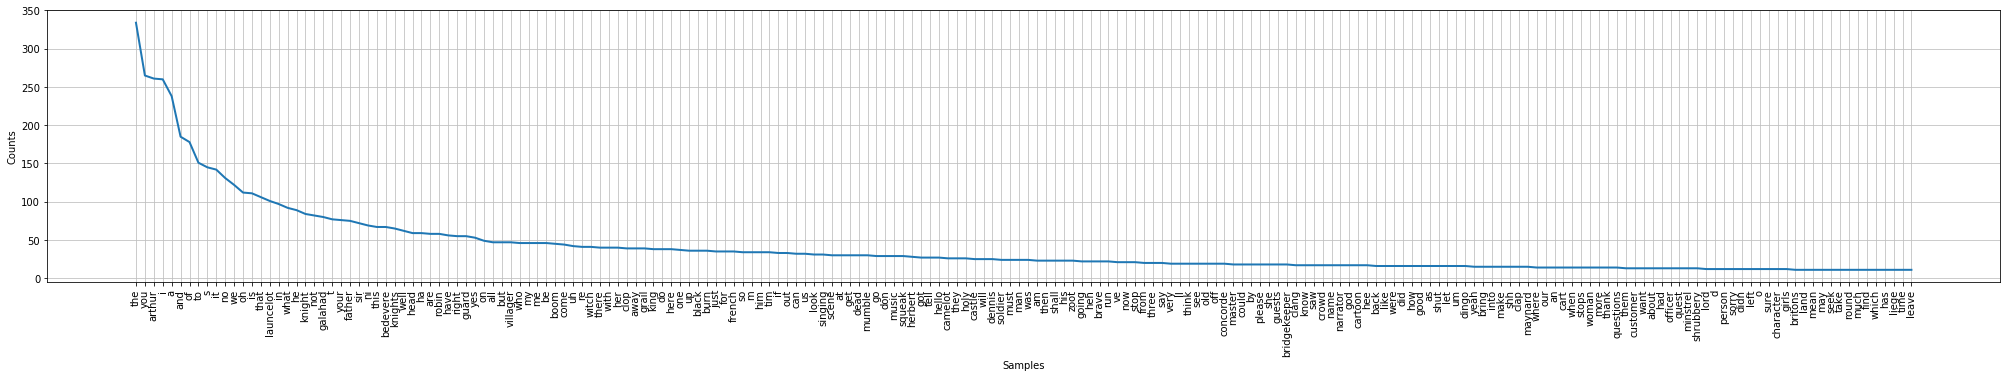

In [8]:
plt.figure(figsize=(35, 5))
fdist.plot(200)

#### Stopwords Excluded

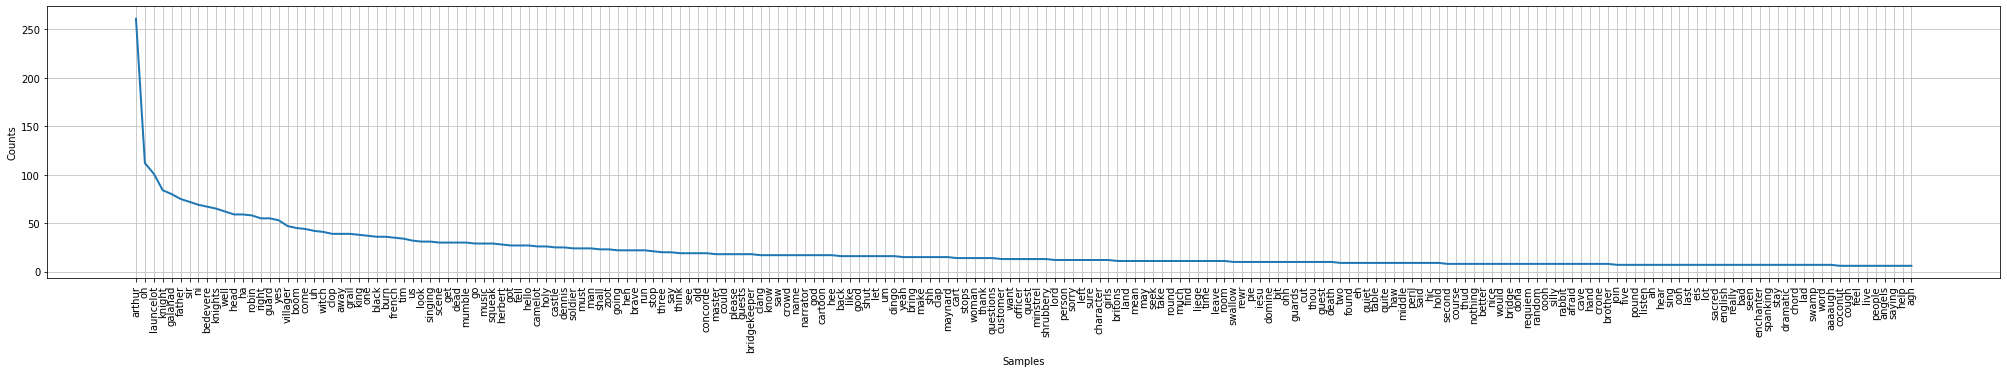

In [9]:
plt.figure(figsize=(35, 5))
fdist2.plot(200)

This above plot shows the frequency of the words.<br> We will calculate relative frequency of the words and plot words with relative frequency. 

In [10]:
rel_freq = {}
word_count=0
total_freq = highestFreq_df['freq'].sum()
for word, value in nltk.FreqDist(highestFreqWords):       
    word_count=word_count+1
    rel_freq[word]=value/total_freq
    if word_count>199:
        break

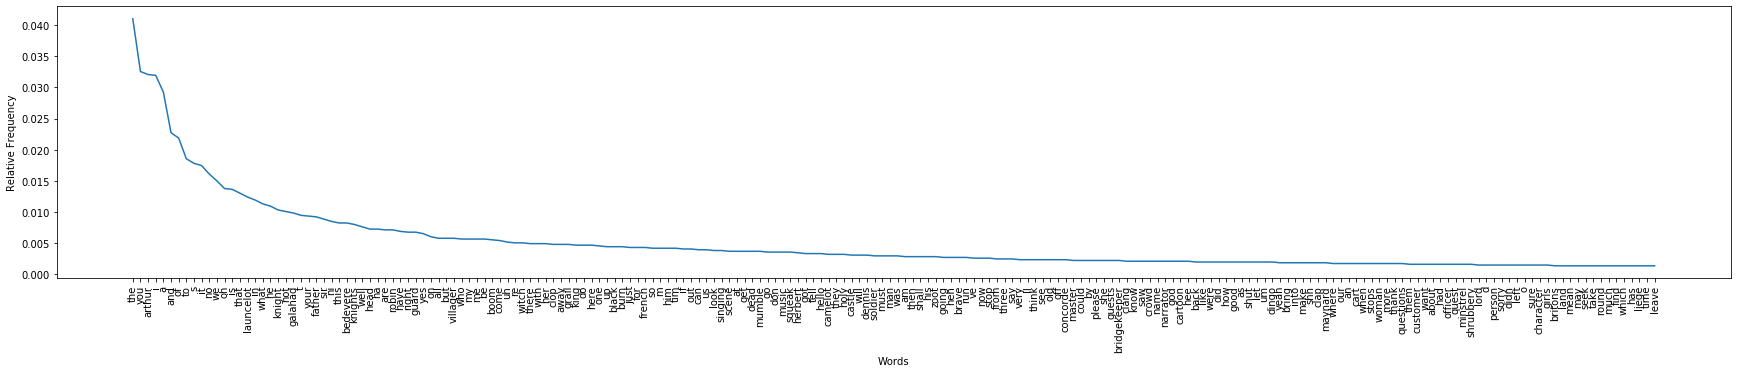

In [11]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)
# return a list of tuples
lists = list(rel_freq.items())
# unpack a list of pairs into two tuples
x, y = zip(*lists) 
plt.plot(x, y)
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.show()

Let's divide the plot into 4 parts and will see each part having 50 words with relative frequency for better visualization.

First 50 words with relative frequency. This plot will show the first 50 words along with its relative frequency.

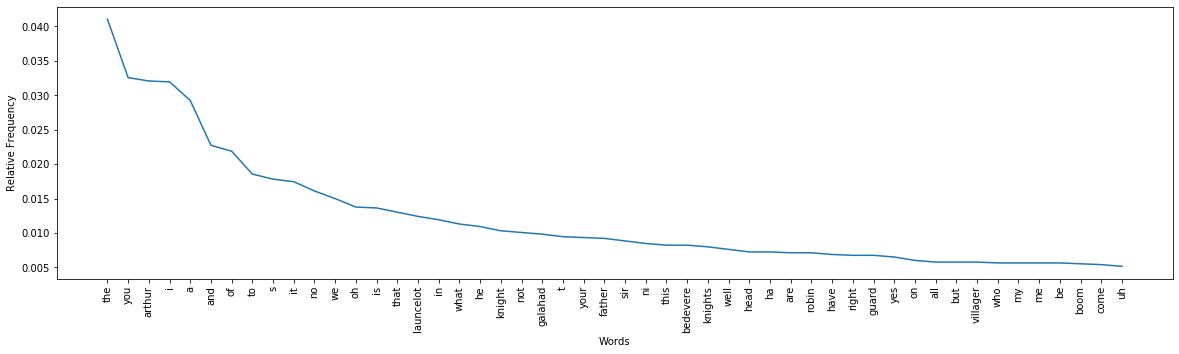

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)
# return a list of tuples
lists_50 = list(rel_freq.items())[:50]
# unpack a list of pairs into two tuples
x, y = zip(*lists_50) 
plt.plot(x, y)
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.show()

Second 50 words with relative frequency. This plot will show 50 to 100 words along with its relative frequency.

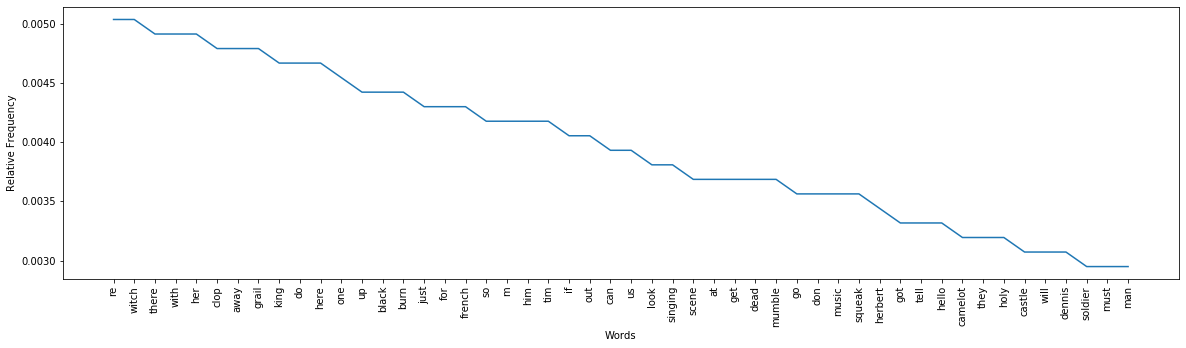

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)
# return a list of tuples
lists_100 = list(rel_freq.items())[50:100]
# unpack a list of pairs into two tuples
x, y = zip(*lists_100) 
plt.plot(x, y)
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.show()

Third 50 words with relative frequency. This plot will show 100 to 150 words along with its relative frequency.

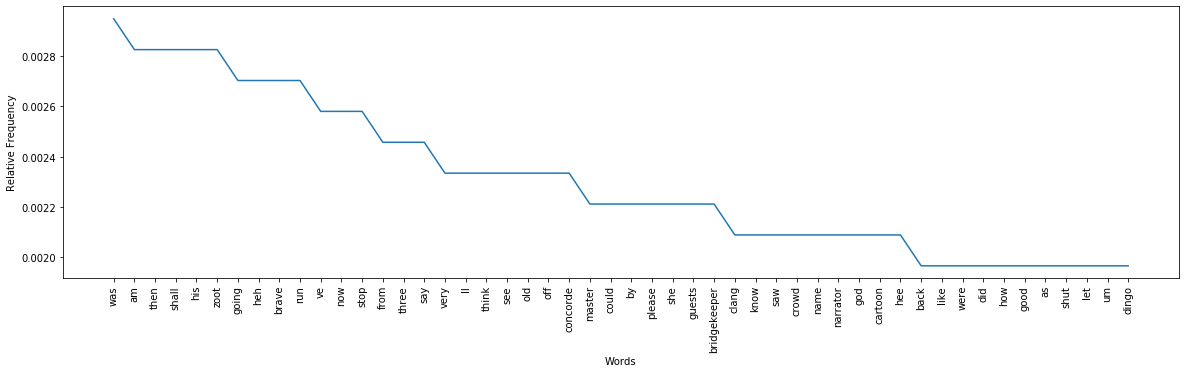

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)
# return a list of tuples
lists_150 = list(rel_freq.items())[100:150]
# unpack a list of pairs into two tuples
x, y = zip(*lists_150) 
plt.plot(x, y)
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.show()

Last 50 words with relative frequency. This plot will show 150 to 200 words along with its relative frequency.

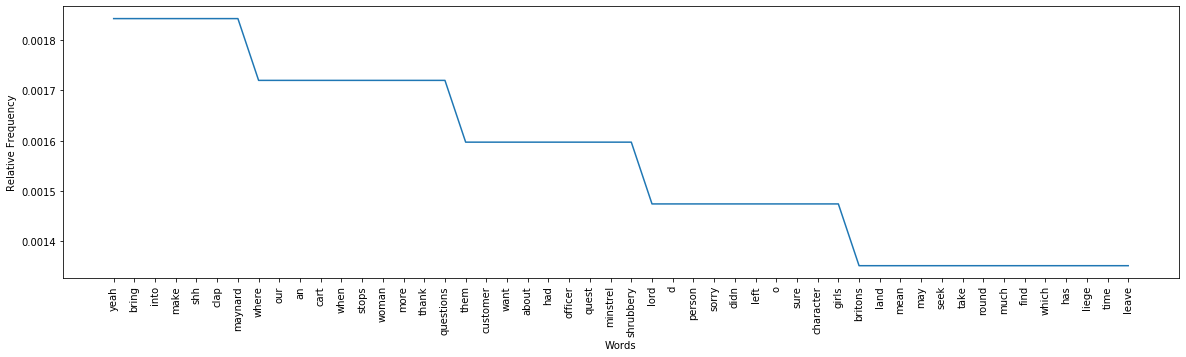

In [15]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)
# return a list of tuples
lists_200 = list(rel_freq.items())[150:200]
# unpack a list of pairs into two tuples
x, y = zip(*lists_200) 
plt.plot(x, y)
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.show()

### (6) Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that the frequencies of certain words are inversely proportional to their rank. In other words, the *nth* word appears 1/n times as often as the most frequent one. For example, the third word in the list appears 1/3 as often as the most common word. 

The answer to this question is dependent on which set of words we do the analysis on: the set with stopwords included or the set with stopwords excluded. Let's take a look at the ratio of the frequency of each word to the frequency of the most popular word. If the observed frequencies follow Zipf's law, we expect the ratios for the first 5 words to be: 1, 0.5, 0.33, 0.25, and 0.2. 

In [16]:
freqs = highestFreq_df['freq']/highestFreq_df['freq'][0]
freqs2 = highestFreq_df2['freq']/highestFreq_df2['freq'][0]

print('Percent of top freq word - stopwords included:','\n',freqs[0:5], '\n')
print('Percent of top freq word - stopwords excluded:','\n',freqs2[0:5])

Percent of top freq word - stopwords included: 
 0    1.000000
1    0.793413
2    0.781437
3    0.778443
4    0.712575
Name: freq, dtype: float64 

Percent of top freq word - stopwords excluded: 
 0    1.000000
1    0.429119
2    0.386973
3    0.321839
4    0.306513
Name: freq, dtype: float64


We can see with stopwords included that the corpus does not follow Zipf's law. The top word occurs less than two times as often as the second, third, fourth, and fifth words.

However, when we remove stopwords from the equation, the corpus follows Zipf's law more closely. The first word occurs a little over 2 times more often than the second and a little over 2.5 times the third. 

### (7) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The *Monty Python and the Holy Grail* text has a large number of commonly used stopwords, but it also has a very large number of unique words. Most of the unique words are only used a handful of times, so the lexical richness is likely higher than the average corpus. Additionally, since the text is based off of a script, many high frequency words are either setting the scene (ex: sounds or scenery descriptions) or indications of the person speaking (ex: King Arthur, Soldier). This is likely different than the average corpus which focuses less on dialogue and setting the scene and more on story-telling.